In [ ]:
# Data Preparation & Loading
import pandas as pd
import numpy as np

# Simulate 5,000 purchase values between 50 and 5,000 INR with natural variability
np.random.seed(42)
purchase_values = np.random.normal(loc=2500, scale=750, size=5000)
purchase_values = np.clip(purchase_values, 50, 5000)

# Convert the list into a Pandas DataFrame
purchase_df = pd.DataFrame({'PurchaseAmount': purchase_values})

# Preview the first five rows and basic stats
print(purchase_df.head())
print(purchase_df.describe())


   PurchaseAmount
0     2872.535615
1     2396.301774
2     2985.766404
3     3642.272392
4     2324.384969
       PurchaseAmount
count     5000.000000
mean      2504.034602
std        746.755547
min         69.049495
25%       2006.571222
50%       2510.099194
75%       2999.507955
max       5000.000000


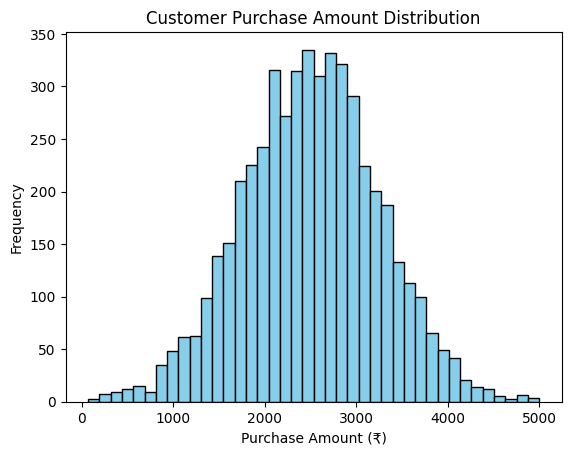

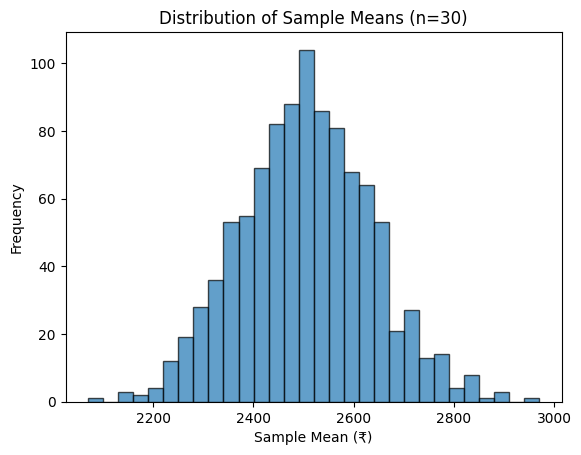

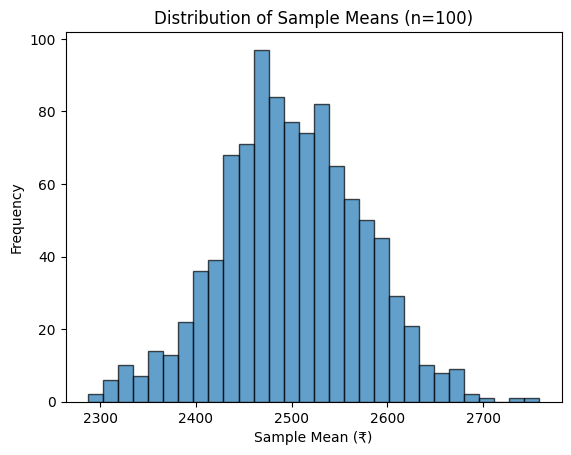

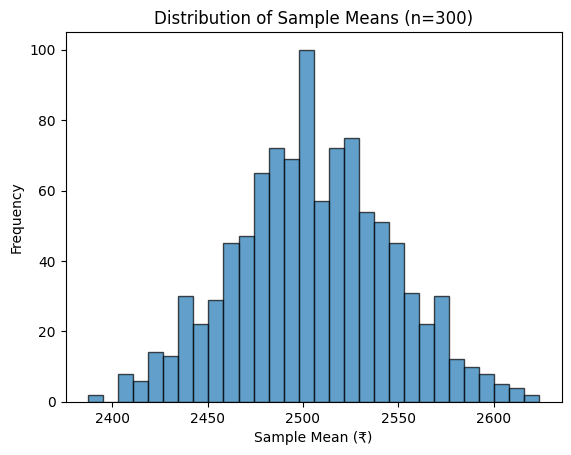

In [ ]:
# 2. Data Exploration & Visualization
import matplotlib.pyplot as plt

# Plot histogram of the original purchase data
plt.hist(purchase_df['PurchaseAmount'], bins=40, color='skyblue', edgecolor='black')
plt.title('Customer Purchase Amount Distribution')
plt.xlabel('Purchase Amount (₹)')
plt.ylabel('Frequency')
plt.show()

# Function to simulate sampling and collect sample means
def sample_means(data, sample_size, n_samples=1000):
    means = []
    for _ in range(n_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        means.append(np.mean(sample))
    return means

# Gather sample means for different sample sizes
sample_sizes = [30, 100, 300]
sample_means_dict = {}

for size in sample_sizes:
    sample_means_dict[size] = sample_means(purchase_values, size)

# Plot histogram for each sample size
for size in sample_sizes:
    plt.hist(sample_means_dict[size], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of Sample Means (n={size})')
    plt.xlabel('Sample Mean (₹)')
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
# 3. Statistical Insight
# Compute and display statistics for dataset
mean = purchase_df['PurchaseAmount'].mean()
median = purchase_df['PurchaseAmount'].median()
variance = purchase_df['PurchaseAmount'].var()
std_dev = purchase_df['PurchaseAmount'].std()

print(f"Population Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

# Compare spread of sample means
for size in sample_sizes:
    print(f"Sample size {size}: Mean of sample means = {np.mean(sample_means_dict[size]):.2f}, SD = {np.std(sample_means_dict[size]):.2f}")

print("Larger sample sizes result in histograms of sample means that are more concentrated (less spread out) and bell-shaped (more normal), demonstrating the Central Limit Theorem in practice. This reduces the variability in estimating the true population mean.")


Population Mean: 2504.03
Median: 2510.10
Variance: 557643.85
Standard Deviation: 746.76
Sample size 30: Mean of sample means = 2504.57, SD = 130.60
Sample size 100: Mean of sample means = 2500.01, SD = 73.10
Sample size 300: Mean of sample means = 2505.31, SD = 40.84
Larger sample sizes result in histograms of sample means that are more concentrated (less spread out) and bell-shaped (more normal), demonstrating the Central Limit Theorem in practice. This reduces the variability in estimating the true population mean.


Enter a sample size (e.g., 50, 100, 500): 50


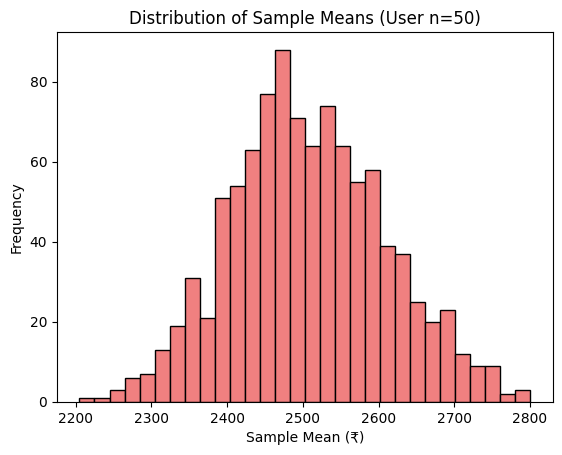

In [ ]:
# 4. Adaptation: Dynamic Sample Size Input
# Allow user input for sample size
user_sample_size = int(input('Enter a sample size (e.g., 50, 100, 500): '))
user_sample_means = sample_means(purchase_values, user_sample_size)

plt.hist(user_sample_means, bins=30, color='lightcoral', edgecolor='black')
plt.title(f'Distribution of Sample Means (User n={user_sample_size})')
plt.xlabel('Sample Mean (₹)')
plt.ylabel('Frequency')
plt.show()
